In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability,number_of_reviews_ltm,license;
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159.0,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,336.0,2023-05-31,1.95,1.0,7.0,40.0,;
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484.0,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106.0,1.0,339.0,2020-04-09,2.10,2.0,0.0,0.0,;
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324.0,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,23.0,2023-01-08,0.16,1.0,2.0,1.0,0363 F88F 4B47 6E9B 225B;
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161.0,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,21.0,2019-08-20,0.15,1.0,0.0,0.0,0363 A562 4D7E 4A91 60DF;
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647.0,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,251.0,2023-05-01,1.81,1.0,0.0,20.0,;


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count', 'availability',
       'number_of_reviews_ltm', 'license;'],
      dtype='object')

# Q1 - What is the number of available rooms by each type ?

In [5]:
def rooms_availability(df) :
    available_rooms = df.groupby('room_type')['availability'].count()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen' ,'cadetblue']
    bars = plt.bar(available_rooms.index , available_rooms.values , color = colors)
    plt.xlabel('Room Type')
    plt.ylabel('Available Rooms')
    plt.title('Number of Available Rooms by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f} room',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

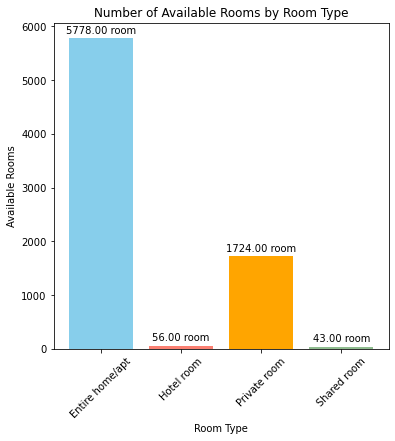

In [6]:
rooms_availability(df)

# Q2 - What is the average price for each room ?

In [7]:
def average_price(df) : 
    avg = df.groupby('room_type')['price'].mean()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen' ,'cadetblue']
    bars = plt.bar(avg.index , avg.values, color=colors)
    plt.xlabel('Room Type')
    plt.ylabel('Average Price')
    plt.title('Average Price by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'${height:.2f}',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

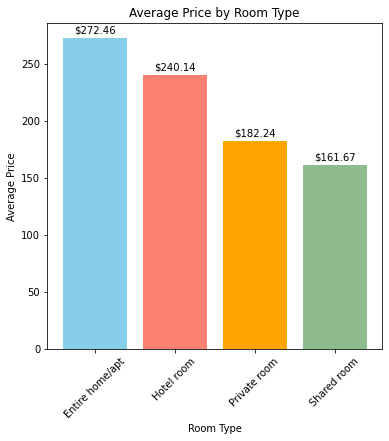

In [8]:
average_price(df)

# Q3 - What is the highest price for each room ?

In [9]:
def highest_price(df) : 
    highest = df.groupby('room_type')['price'].max()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen' ,'cadetblue']
    bars = plt.bar(highest.index , highest.values, color=colors)
    plt.xlabel('Room Type')
    plt.ylabel('Max Price')
    plt.title('Maximum Price by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'${height:.2f}',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

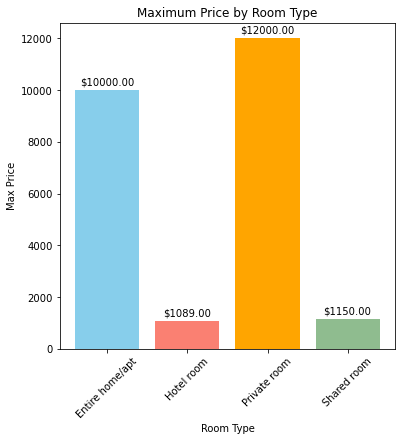

In [10]:
highest_price(df)

# Q4 - What is the lowest price for each room ?

In [11]:
def lowest_price(df) : 
    lowest = df.groupby('room_type')['price'].min()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen' ,'cadetblue']
    bars = plt.bar(lowest.index , lowest.values, color=colors)
    plt.xlabel('Room Type')
    plt.ylabel('Min Price')
    plt.title('Minimum Price by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'${height:.2f}',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

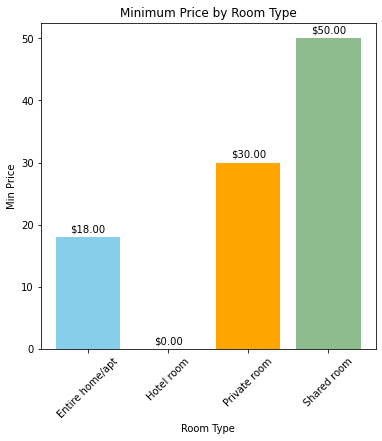

In [12]:
lowest_price(df)

# Q5 - What are available neighbourhood and count of them ?

In [13]:
def neighbourhood_count(df) :
    neighbourhood = df['neighbourhood'].value_counts()
    plt.figure(figsize=(8,8))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen' ,'cadetblue']
    bars = plt.bar(neighbourhood.index , neighbourhood.values , color=colors )
    plt.xlabel('Neighbourhood')
    plt.ylabel('Neighbourhood Count')
    plt.title('Available Neighbourhood by count')
    plt.xticks(rotation=90)
    for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{height:0.0f}',xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

### Data Cleaning :

In [14]:
def clean_missing_data(df):
    missing_columns_values = df.columns[df.isnull().any()]
    for column in missing_columns_values:
        if df[column].dtype == 'object':
            df[column] = df[column].fillna('Unknown')
        elif df[column].dtype == 'bool':
            df[column] = df[column].fillna(False)
        else:
            df[column] = df[column].fillna(df[column].mean())

### Check file is in the types range or not :

In [15]:
def get_file_types(file_type):
    while True :
        file_path = input('Please enter your file path : ')
        if file_path.endswith(tuple(file_type)):
            return file_path
        else :
            print('Please enter a valid path from this range {}'.format(file_type))

### Check every file Path :

In [16]:
def check_file_path(file_path):
    
    if file_path.endswith('csv'):
        df = pd.read_csv(file_path.strip())
        
    elif file_path.endswith('xlsx'):
        df = pd.read_excel(file_path.strip())
        
    elif file_path.endswith('sql'):
        df = pd.read_sql(file_path.strip())
        
    return df

### Code runs here :

Please enter your file path : listings.csv


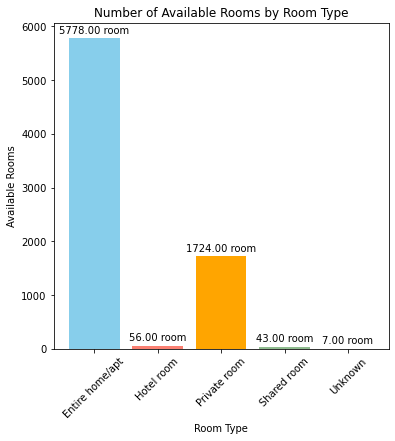

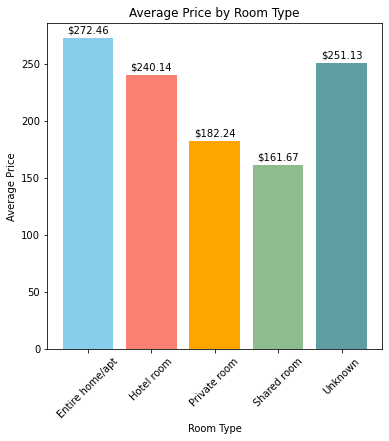

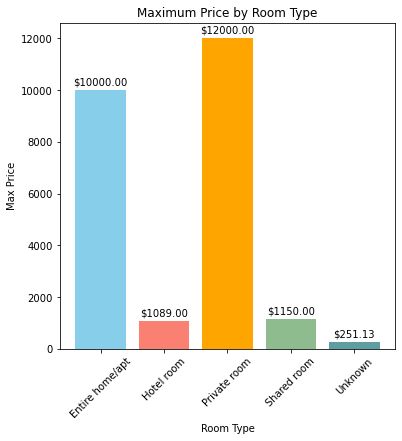

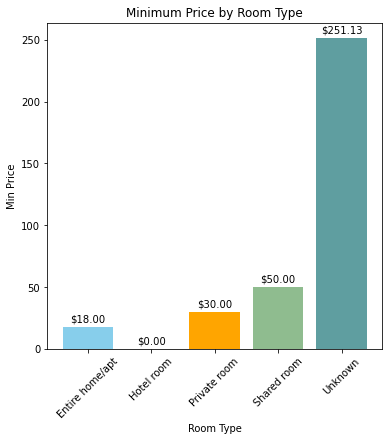

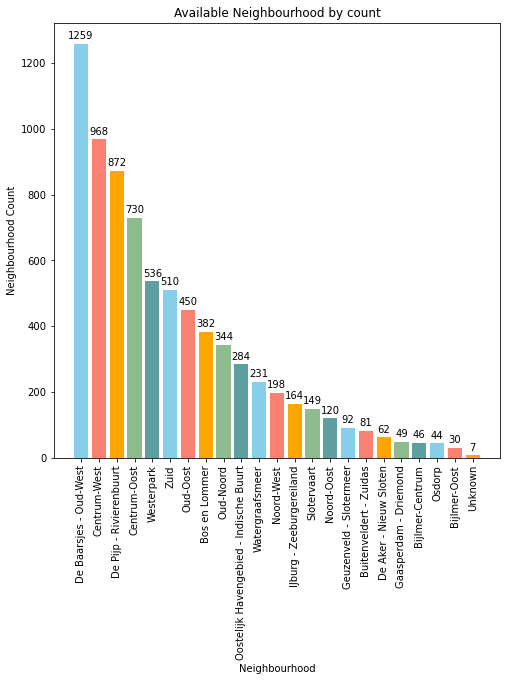

In [18]:
def main():
    file_type = ['.csv','.xlsx','.sql']
    file_path = get_file_types(file_type)
    df = check_file_path(file_path)
    clean_missing_data(df)
    rooms_availability(df)
    average_price(df)
    highest_price(df)
    lowest_price(df)
    neighbourhood_count(df)
if __name__ == "__main__":
    main()